<a href="https://colab.research.google.com/github/lucasg1005/Quarentena_Dados/blob/master/QuarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


**AULA 01**

DESAFIO 01
Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
#criando dataframe "filmes" e "notas"
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')

In [160]:
#'.head()' mostra os 5 primeiros dados do dataframe
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [161]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [162]:
#mudando os nomes das colunas do dataframe "filmes" com o '.columns'
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [163]:
#mudando os nomes das colunas do dataframe "notas" com o '.columns'
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [164]:
#agrupando as notas médias pra cada filme com '.groupby()'
nota_media = notas.groupby('filmeId')['nota'].mean()
nota_media.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [165]:
#criando um novo dataframe com '.join' para reunir a nota média para cada filme
filmes_com_nota = filmes.join(nota_media, on='filmeId')
filmes_com_nota.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [166]:
#descubrindo os filmes não avaliados com 'isnull()' e mostrando a contagem com '.value_counts()'
filmes_com_nota['nota'].isnull().value_counts()

False    9724
True       18
Name: nota, dtype: int64

In [167]:
#exibindo os filmes não avaliados
filmes_com_nota[filmes_com_nota['nota'].isnull()]

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


**DESAFIO 02**
Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [168]:
#alteramos o nome da coluna com '.rename'
filmes_com_nota.rename(columns = {'nota': 'nota_media'}, inplace = True)
filmes_com_nota.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


**DESAFIO 03**
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [169]:
#agrupando a quantidade de votos por filme
notas_totais = notas.groupby('filmeId')['nota'].count()
notas_totais

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [170]:
#agrupando o total de votos no dataframe 'filmes_com_nota'
filmes_com_nota_total = filmes_com_nota.join(notas_totais, on = 'filmeId')
filmes_com_nota_total.rename(columns= {'nota': 'total_votos'}, inplace=True)
filmes_com_nota_total.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


**DESAFIO 04**
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [171]:
#arredondando as casas decimais com '.round()'
filmes_com_nota_total = filmes_com_nota_total.round({'nota_media': 2})
filmes_com_nota_total.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


**DESAFIO 05**
Descobrir os generos dos filmes (quais são eles, únicos).

**DESAFIO 06**
Contar a quantidade de aparições de cada genero

In [172]:
#com '.get_dummies()' eu retiro as barras para separar os generos, somo eles com 'sum() e coloco em ordem descrescente com sort_values()
generos = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending = False)
generos

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

**DESAFIO 07**
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

Text(0.5, 1.0, 'Aparições de cada genero')

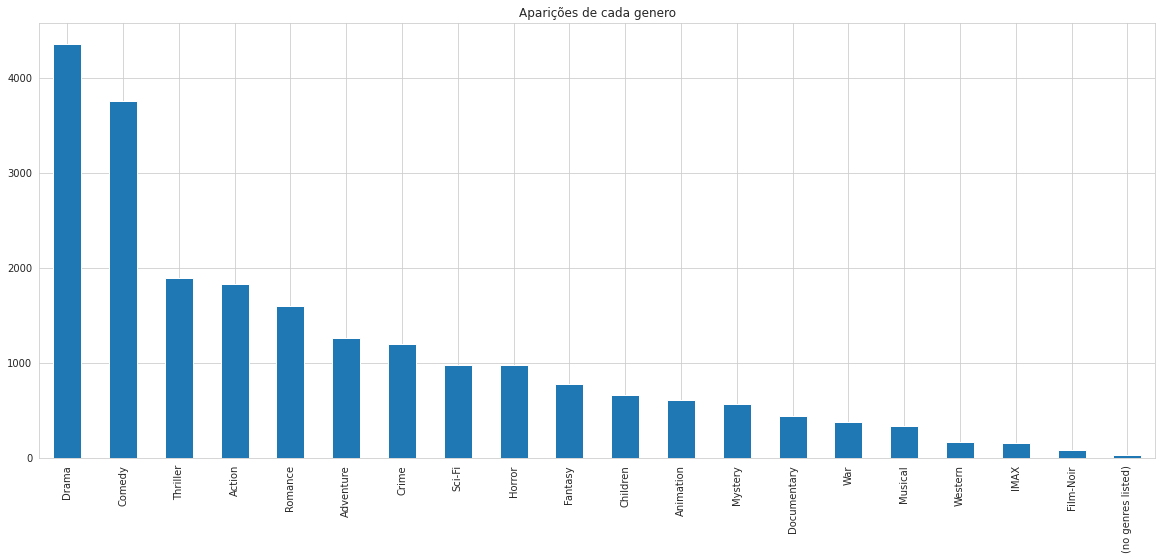

In [173]:
#plotando o gráfico de aparições de cada genero com '.plot'
generos.plot(kind = 'bar', figsize = (20,8)).set_title('Aparições de cada genero')

**AULA 02**


**DESAFIO 01**
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

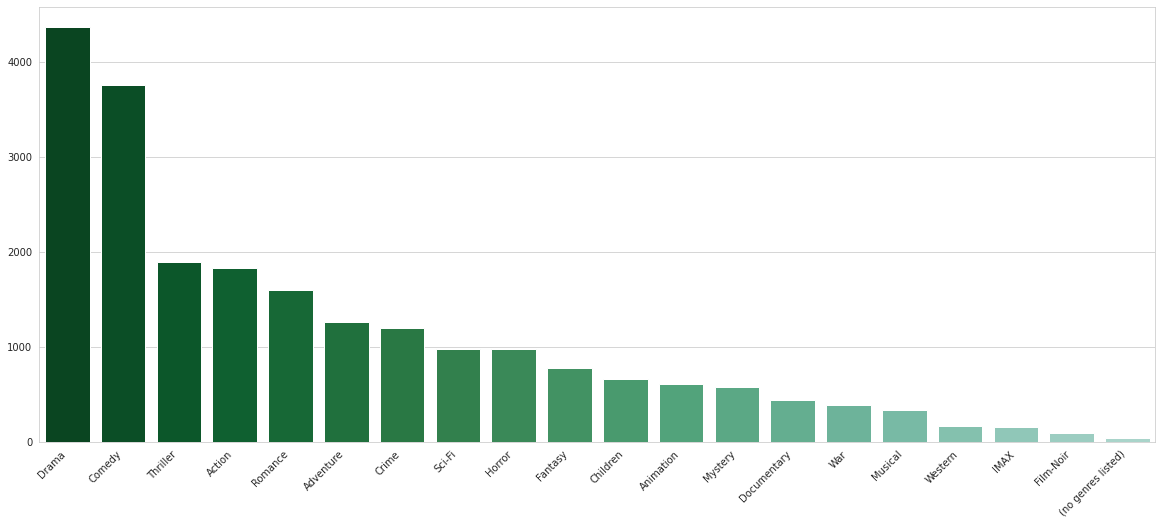

In [229]:
#rotacionamos os ticks do eixo x com 'plt.xticks()'
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
sns.barplot(x = generos.index , y = generos.values,
            palette = sns.color_palette('BuGn_r', n_colors = len(generos) + 10) )

plt.xticks(rotation = 45, horizontalalignment = 'right')
    

**DESAFIO 02**
Encontrar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [232]:
#separando o dataframe "filmes_com_nota" por ordem decrescente na faixa do id[2300:2400]
filmes_com_nota.sort_values('nota_media', ascending=False)[2300:2400]


,filmeId,titulo,generos,nota_media
915,1214,Alien (1979),Horror|Sci-Fi,3.969178
942,1243,Rosencrantz and Guildenstern Are Dead (1990),Comedy|Drama,3.968750
2216,2944,"Dirty Dozen, The (1967)",Action|Drama|War,3.968750
7014,68237,Moon (2009),Drama|Mystery|Sci-Fi|Thriller,3.968750
1375,1884,Fear and Loathing in Las Vegas (1998),Adventure|Comedy|Drama,3.967391
...,...,...,...,...
8695,122918,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci-Fi,3.925926
9433,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi,3.925926
1298,1732,"Big Lebowski, The (1998)",Comedy|Crime,3.924528
4332,6331,Spellbound (2002),Documentary,3.923077


In [0]:
#definindo função para plotar um gráfico com informações do filme pelo id

def plot_filme(n):
  nota_filme = notas.query(f'filmeId == {n}')['nota']
  nota_filme.plot(kind = 'hist')
  plt.show()
  nota_filme.plot.box()
  plt.show()

  return nota_filme.describe()


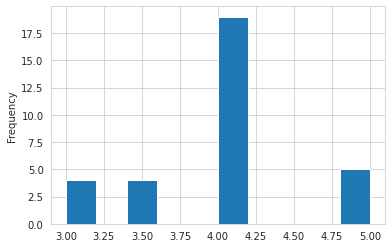

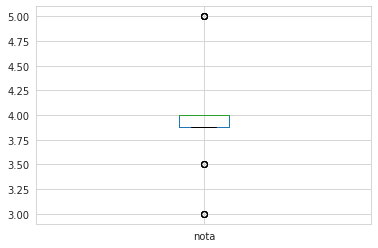

count    32.000000
mean      3.968750
std       0.567074
min       3.000000
25%       3.875000
50%       4.000000
75%       4.000000
max       5.000000
Name: nota, dtype: float64

In [248]:
#The Dirty Dozen (Id = 2944) / Moon (Id = 68237)
plot_filme(2944)

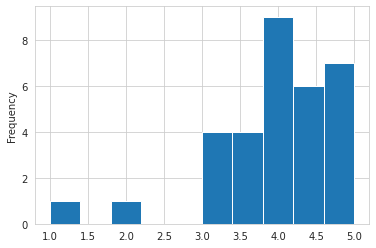

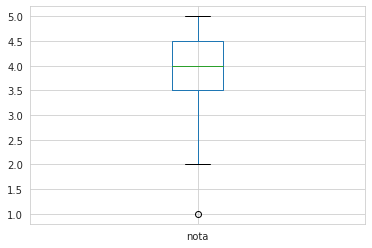

count    32.00000
mean      3.96875
std       0.92403
min       1.00000
25%       3.50000
50%       4.00000
75%       4.50000
max       5.00000
Name: nota, dtype: float64

In [289]:
#Moon (Id = 68237)
plot_filme(68237)


**DESAFIO 03**
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [251]:
#exibindo os 10 filmes com maior quantidade de votos
filmes_com_nota_total.sort_values('total_votos', ascending = False).head(10)

,filmeId,titulo,generos,nota_media,total_votos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.0
97,110,Braveheart (1995),Action|Drama|War,4.03,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.0
461,527,Schindler's List (1993),Drama|War,4.22,220.0


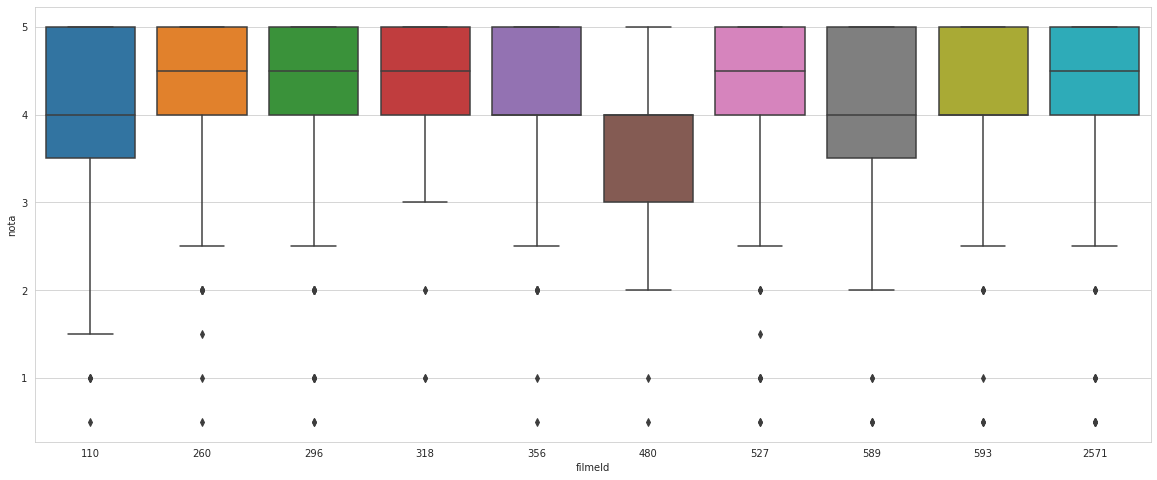

In [285]:
filmes_com_mais_votos = filmes_com_nota_total.sort_values(by='total_votos', ascending=False).head(10)
filmes_com_mais_votos_titulos = filmes_com_mais_votos['titulo'].to_list()
filmes_com_mais_votos_ids = filmes_com_mais_votos['filmeId'].to_list()

plt.figure(figsize = (20,8))
sns.boxplot(x='filmeId', y= 'nota', data = notas.query(f'filmeId in {filmes_com_mais_votos_ids}'))

**DESAFIO 04**
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

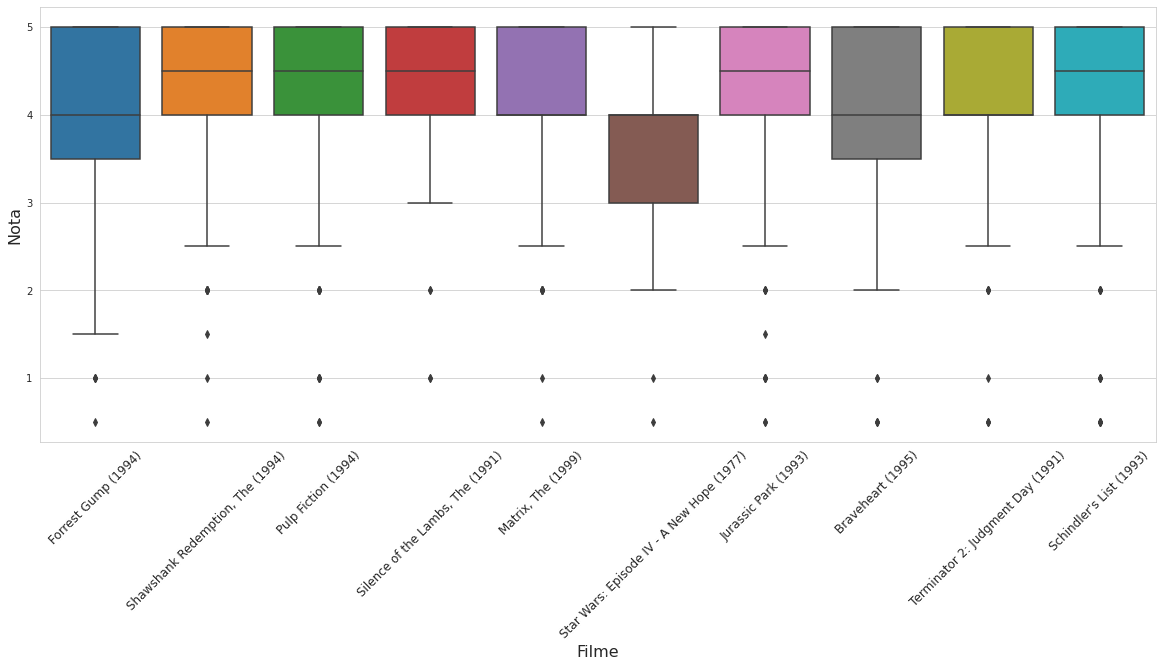

In [287]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(x='filmeId', y= 'nota', data = notas.query(f'filmeId in {filmes_com_mais_votos_ids}'))
ax.set_xticklabels(filmes_com_mais_votos_titulos, fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)
plt.show()

**DESAFIO 05**
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
def explora_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    nota = notas.query(f'filmeId == {filme_id}')['nota']
    
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {nota.mode().values}')    
    print(f'Média: {nota.mean()}')
    print(f'Mediana: {nota.median()}')
    print('------------')

In [293]:
explora_filme(236)
explora_filme(456)
explora_filme(2360)

Filme: French Kiss (1995)

Moda: [3.]
Média: 3.477777777777778
Mediana: 3.0
------------
Filme: Fresh (1994)

Moda: [2.  3.5 4.5 5. ]
Média: 3.75
Mediana: 4.0
------------
Filme: Celebration, The (Festen) (1998)

Moda: [4.5]
Média: 4.458333333333333
Mediana: 4.5
------------


**DESAFIO 06**
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

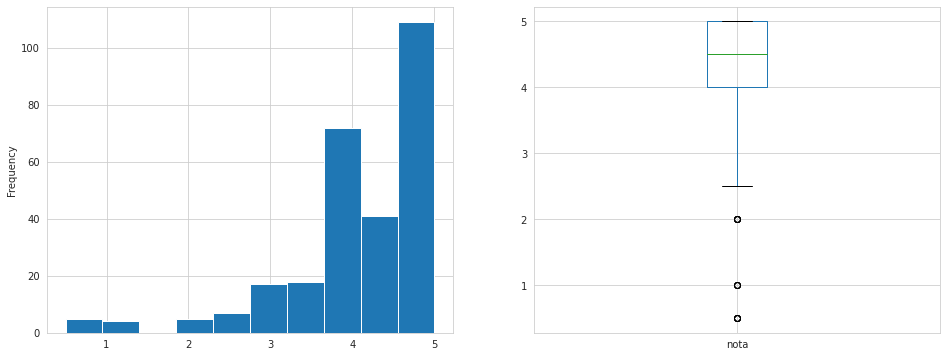

In [295]:
the_matrix = notas.query('filmeId == 2571')['nota']

f, axes = plt.subplots(1, 2, figsize=(16, 6))

the_matrix.plot(kind='hist', ax=axes[0])
the_matrix.plot(kind='box', ax=axes[1])

plt.show()

**DESAFIO 07**
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [297]:
filmes_com_media_ano = filmes_com_nota.copy()
filmes_com_media_ano['ano'] = filmes_com_nota['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_ano.head()

,filmeId,titulo,generos,nota_media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


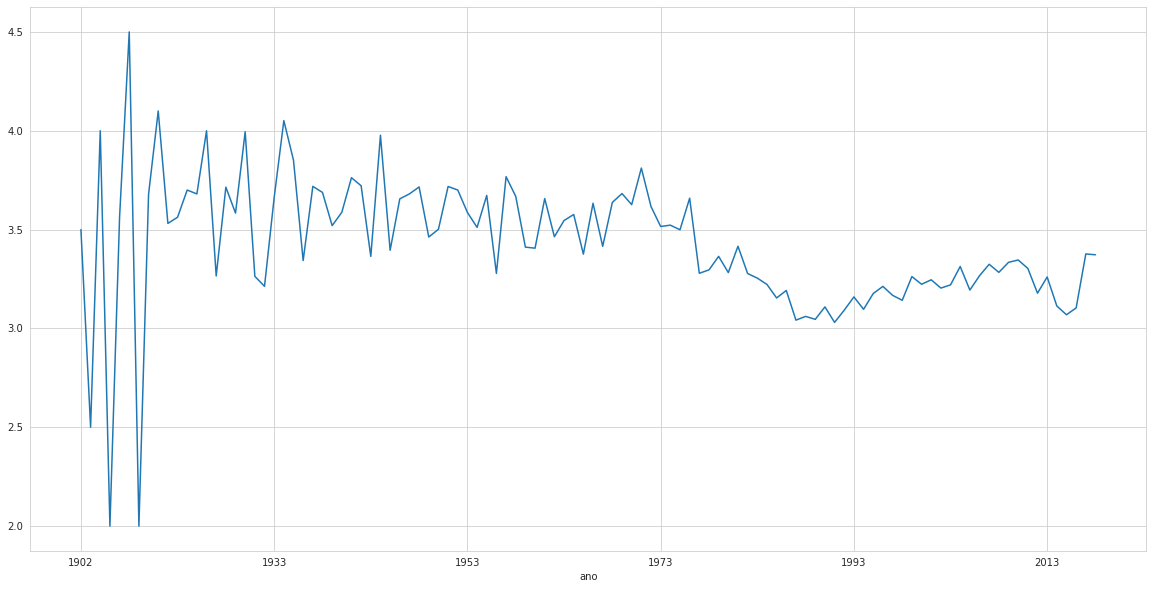

In [305]:
plt.figure(figsize = (20,10))

nota_media_ano = filmes_com_media_ano.groupby('ano')['nota_media'].mean()
nota_media_ano.plot()

**AULA 03**

**DESAFIO 01**
Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [307]:
imdb = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [324]:
imdb['color'].dropna()
color_or_bw = imdb.query("color in ['Color', 'Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()
color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


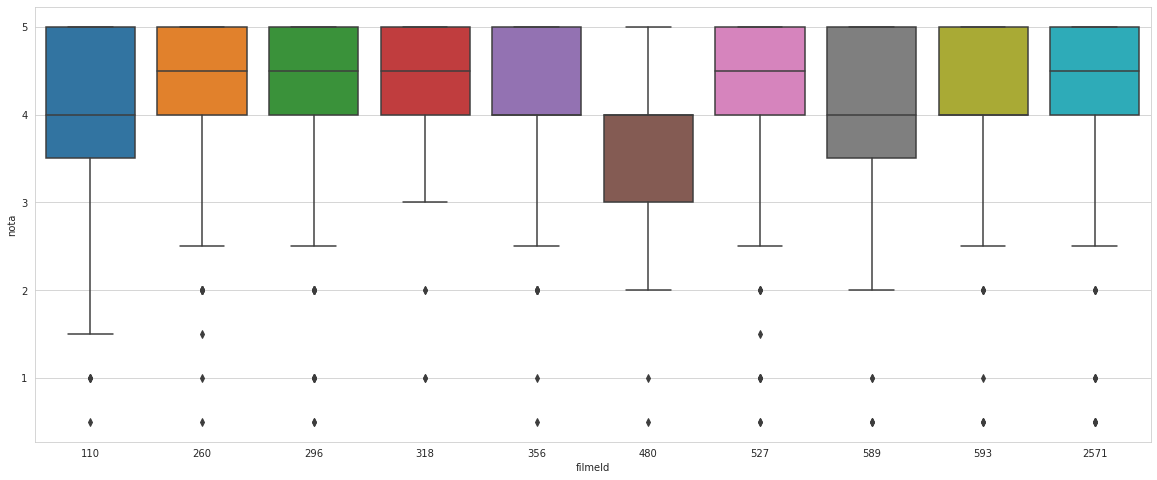

In [326]:
filmes_com_mais_votos = filmes_com_nota_total.sort_values(by='total_votos', ascending=False).head(10)
filmes_com_mais_votos_titulos = filmes_com_mais_votos['titulo'].to_list()
filmes_com_mais_votos_ids = filmes_com_mais_votos['filmeId'].to_list()

plt.figure(figsize = (20,8))
sns.boxplot(x='filmeId', y= 'nota', data = notas.query(f'filmeId in {filmes_com_mais_votos_ids}'))


imdb_colorido = color_or_bw['color_0_ou_1'] == 1

In [334]:
imdb_colorido = color_or_bw['color_0_ou_1'] == 1
imd_bw = color_or_bw['color_0_ou_1'] == 0
sns.boxplot(x='color_0_ou_1', y= 'imdb_score', data = imdb.query('color'))


ValueError: ignored